In [56]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble, linear_model, preprocessing, cross_validation, neighbors, tree, svm, feature_selection
from sklearn.utils import shuffle
from sklearn.preprocessing import Imputer
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.utils import resample

In [113]:
df = pd.read_csv('responses.csv')
cols = pd.read_csv('columns.csv')

In [114]:
df.isnull().sum().sort_values(ascending=False).head(20)

Weight                   20
Height                   20
Passive sport            15
Chemistry                10
Geography                 9
Documentary               8
Latino                    8
Smoking                   8
Punk                      8
Theatre                   8
Rock n roll               7
Countryside, outdoors     7
Gardening                 7
Techno, Trance            7
Alternative               7
Reggae, Ska               7
Classical music           7
Age                       7
Daily events              7
Compassion to animals     7
dtype: int64

In [116]:
df = df.drop(['Only child', 'Education', 'Left - right handed', 'Number of siblings', 'Weight', 'Height'], 1)

In [117]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [118]:
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
newdf = pd.DataFrame(data=imp.fit_transform(newdf), columns=newdf.columns)

In [119]:
newdf.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,3.0,3.0,4.0,5.0,3.0,3.0,1.0,3.0,20.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,3.0,3.0,4.0,1.0,4.0,2.0,5.0,2.0,19.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,20.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,4.0,2.0,4.0,3.0,3.0,4.0,4.0,1.0,22.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,3.0,4.0,3.0,4.0,3.0,3.0,2.0,4.0,20.0


In [120]:
catdata = pd.DataFrame()

catdata['Smoking'] = df['Smoking']
catdata['Alcohol'] = df['Alcohol']
catdata['Punctuality'] = df['Punctuality']
catdata['Lying'] = df['Lying']
catdata['Internet usage'] = df['Internet usage']
catdata['Gender'] = df['Gender']
catdata['Village - town'] = df['Village - town']
catdata['House - block of flats'] = df['House - block of flats']

In [122]:
df = newdf.join(catdata)

In [123]:
df = df.dropna(subset = ['Smoking', 
                         'Alcohol', 
                         'Punctuality', 
                         'Lying', 
                         'Internet usage', 
                         'Gender', 
                         'Village - town', 
                         'House - block of flats'])

In [124]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,20.0,never smoked,drink a lot,i am always on time,never,few hours a day,female,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,19.0,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,20.0,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,22.0,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,female,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,4.0,20.0,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,village,house/bungalow


In [125]:
df.isnull().sum().sort_values(ascending=False).head(15)

House - block of flats    0
Village - town            0
Musical instruments       0
Dancing                   0
Countryside, outdoors     0
Religion                  0
Art exhibitions           0
Cars                      0
Law                       0
Medicine                  0
Foreign languages         0
Geography                 0
Reading                   0
Chemistry                 0
Biology                   0
dtype: int64

### Class Imbalance

In [126]:
df['Age'].value_counts().sort_index()

15.0     11
16.0     29
17.0     53
18.0    116
19.0    210
20.0    189
21.0    127
22.0     82
23.0     45
24.0     28
25.0     28
26.0     15
27.0     13
28.0     16
29.0     10
30.0     10
Name: Age, dtype: int64

The bulk of our respondants are in the 18-22 year age group with sharp declines under 17 and over 25. In this instance it seems prudent to upsample our minority classes. 

In [127]:
df_15 = df[df.Age==15]
df_15_upsampled = resample(df_15,replace=True, n_samples=114, random_state=123)

df_16 = df[df.Age==16]
df_16_upsampled = resample(df_16,replace=True, n_samples=96, random_state=123)

df_17 = df[df.Age==17]
df_17_upsampled = resample(df_17,replace=True, n_samples=72, random_state=123)

df_22 = df[df.Age==22]
df_22_upsampled = resample(df_22,replace=True, n_samples=43, random_state=123)

df_23 = df[df.Age==23]
df_23_upsampled = resample(df_23,replace=True, n_samples=78, random_state=123)

df_24 = df[df.Age==24]
df_24_upsampled = resample(df_24,replace=True, n_samples=97, random_state=123)

df_25 = df[df.Age==25]
df_25_upsampled = resample(df_25,replace=True, n_samples=95, random_state=123)

df_26 = df[df.Age==26]
df_26_upsampled = resample(df_26,replace=True, n_samples=110, random_state=123)

df_27 = df[df.Age==27]
df_27_upsampled = resample(df_27,replace=True, n_samples=111, random_state=123)

df_28 = df[df.Age==28]
df_28_upsampled = resample(df_28,replace=True, n_samples=108, random_state=123)

df_29 = df[df.Age==29]
df_29_upsampled = resample(df_29,replace=True, n_samples=114, random_state=123)

df_30 = df[df.Age==30]
df_30_upsampled = resample(df_30,replace=True, n_samples=115, random_state=123)



# df_minority = df[df.balance==1]

# Upsample minority class

 
# Combine majority class with upsampled minority class
df = pd.concat([df, 
                df_15_upsampled, 
                df_16_upsampled, 
                df_17_upsampled,
                df_22_upsampled,
                df_23_upsampled,
                df_24_upsampled, 
                df_25_upsampled,
                df_26_upsampled, 
                df_27_upsampled,
                df_28_upsampled, 
                df_29_upsampled,
                df_30_upsampled,
               ])
 
# Display new class counts
# df_upsampled.balance.value_counts()

In [128]:
df['Age'].value_counts().sort_index()

15.0    125
16.0    125
17.0    125
18.0    116
19.0    210
20.0    189
21.0    127
22.0    125
23.0    123
24.0    125
25.0    123
26.0    125
27.0    124
28.0    124
29.0    124
30.0    125
Name: Age, dtype: int64

# Youth Data Visualizations

Text(0.5,1,'I ALWAYS TRY TO VOTE IN ELECTIONS')

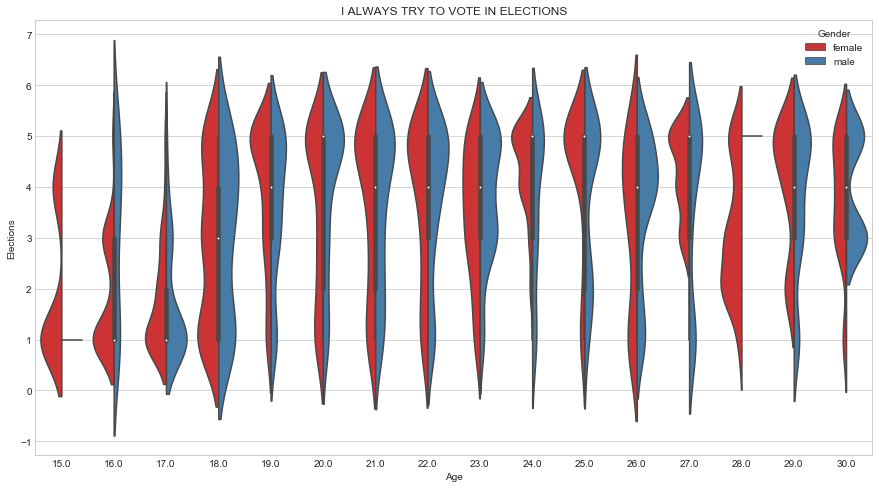

In [160]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Age', y='Elections', hue='Gender', data=df, split=True, palette='Set1')
plt.title('I ALWAYS TRY TO VOTE IN ELECTIONS')

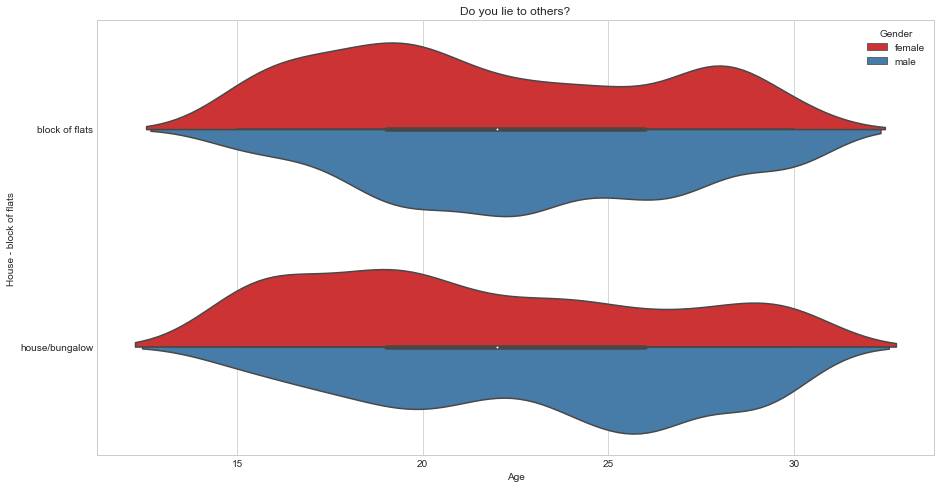

In [176]:
plt.figure(figsize=(15,8))
plt.title("Do you lie to others?")
sns.violinplot(x='Age', y='House - block of flats', hue='Gender', data=df, split=True, palette='Set1')

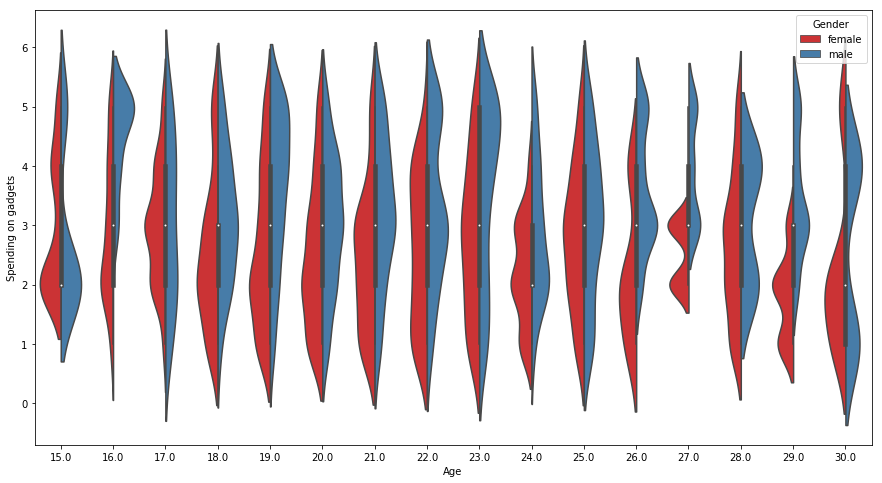

In [131]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Age', y='Spending on gadgets', hue='Gender', data=df, split=True, palette='Set1')

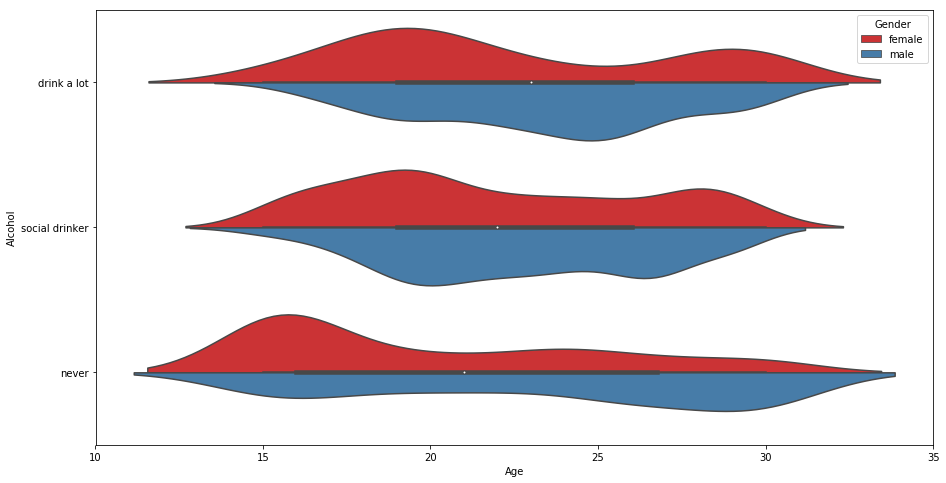

In [132]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Age', y='Alcohol', hue='Gender', data=df, split=True, palette='Set1')

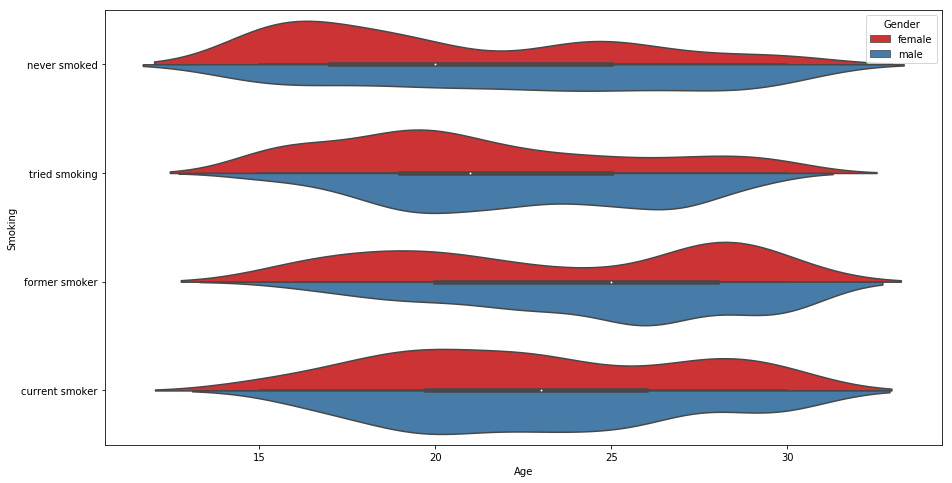

In [133]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Age', y='Smoking', hue='Gender', data=df, split=True, palette='Set1')

Text(0.5,1,'I DO NOT LIKE SEEING ANIMALS SUFFERING')

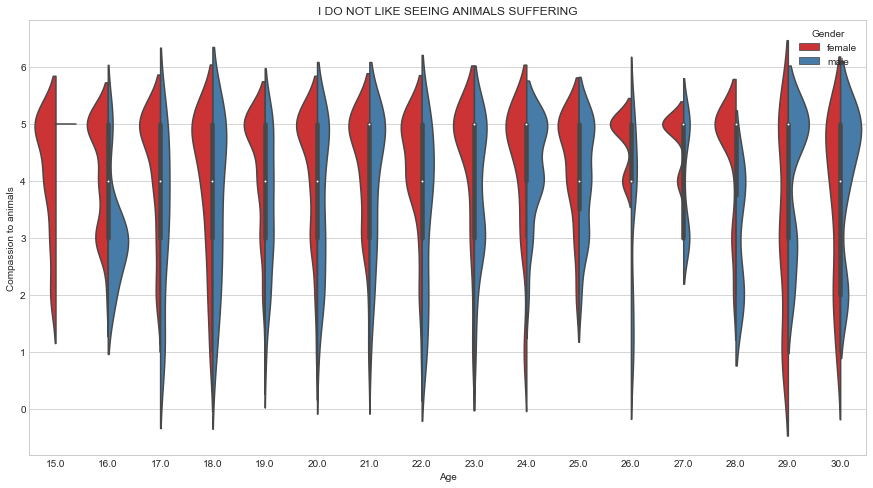

In [171]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Age', y='Compassion to animals', hue='Gender', data=df, split=True, palette='Set1')
plt.title('I DO NOT LIKE SEEING ANIMALS SUFFERING')

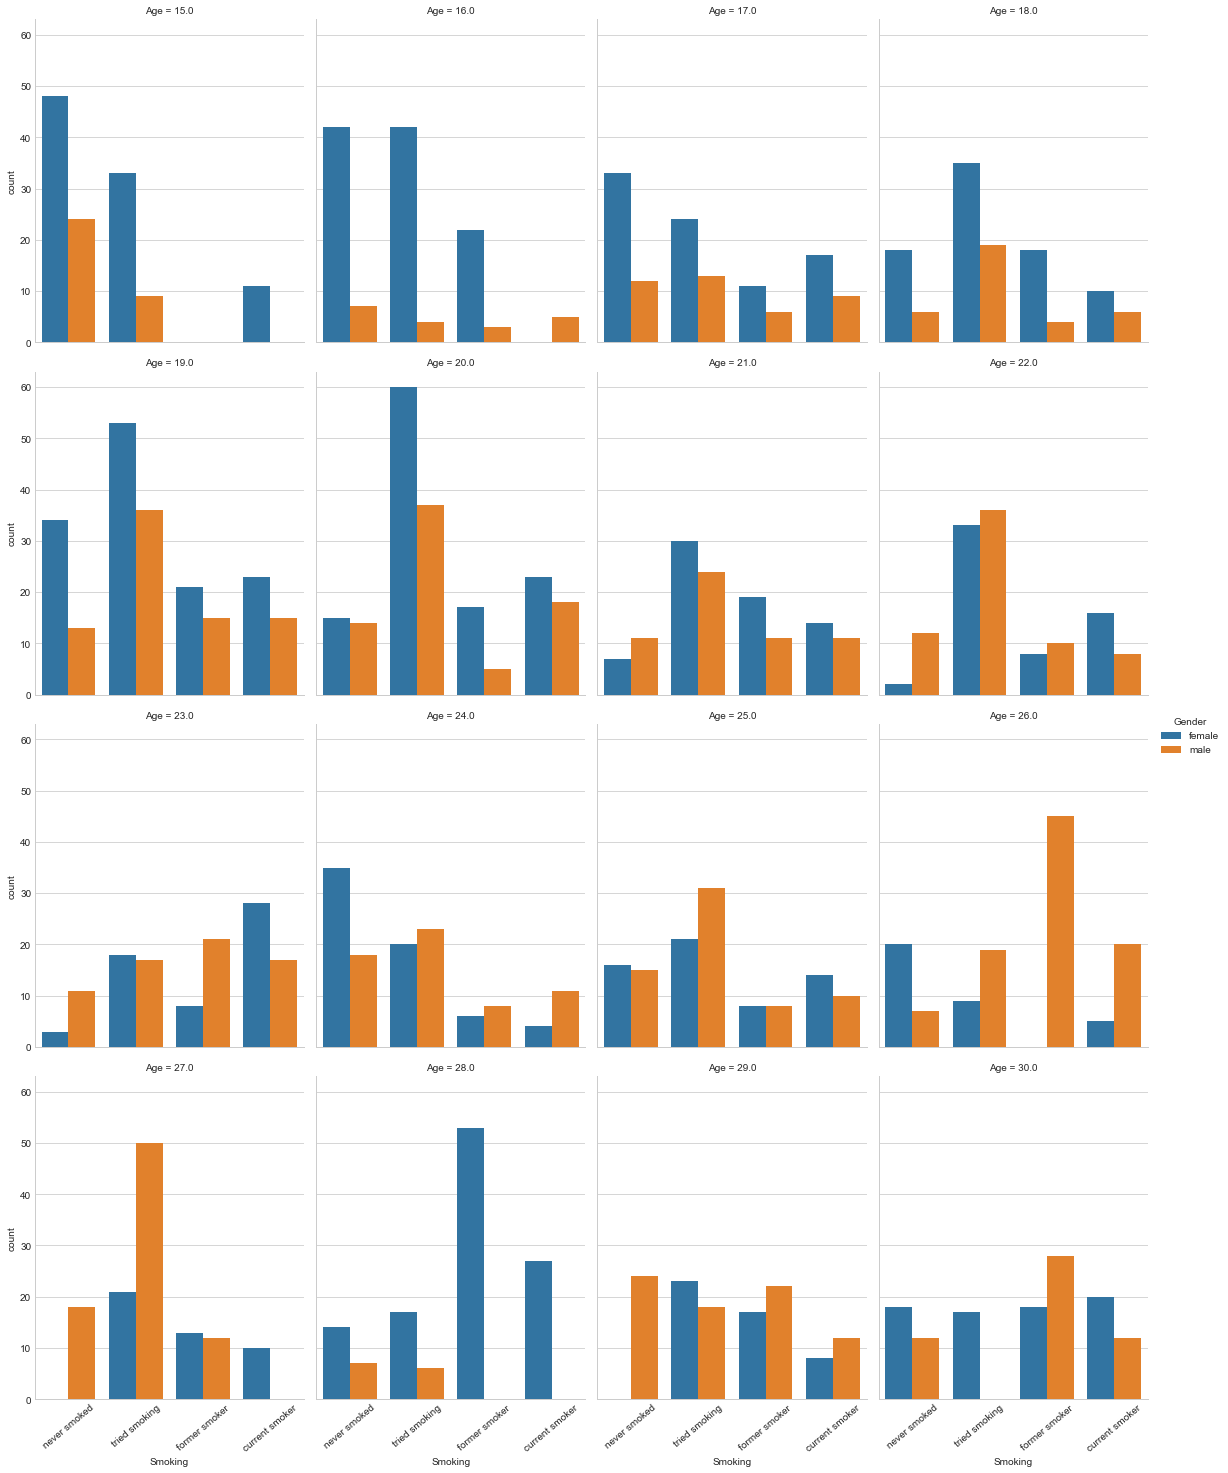

In [165]:
# sns.set_style("white")
# fig, ax = plt.subplots()
# the size of A4 paper
# fig.set_size_inches(11.7, 8.27)
g = sns.factorplot("Smoking", hue="Gender", col="Age", col_wrap=4, data=df, kind="count", size=5, aspect=.8)
g.set_xticklabels(rotation=40)
sns.despine()